In [5]:
import datetime as dt

import pandas_datareader.data as web

from arch import arch_model

start = dt.datetime(2000, 1, 1)
end = dt.datetime(2014, 1, 1)
sp500 = web.DataReader('^GSPC', 'yahoo', start=start, end=end)
returns = 100 * sp500['Adj Close'].pct_change().dropna()
am = arch_model(returns, dist="t")

In [6]:
res = am.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 210157.57024652307
Iteration:      2,   Func. Count:     17,   Neg. LLF: 146306.14568579488
Iteration:      3,   Func. Count:     25,   Neg. LLF: 5125.853146737974
Iteration:      4,   Func. Count:     32,   Neg. LLF: 5116.636899874653
Iteration:      5,   Func. Count:     39,   Neg. LLF: 8110.627179187513
Iteration:      6,   Func. Count:     46,   Neg. LLF: 8585.52436260918
Iteration:      7,   Func. Count:     53,   Neg. LLF: 5103.458898249705
Iteration:      8,   Func. Count:     60,   Neg. LLF: 5650.2823348668335
Iteration:      9,   Func. Count:     67,   Neg. LLF: 5100.757133017296
Iteration:     10,   Func. Count:     74,   Neg. LLF: 5098.824910242163
Iteration:     11,   Func. Count:     80,   Neg. LLF: 5098.804365060898
Iteration:     12,   Func. Count:     86,   Neg. LLF: 5098.804316531463
Iteration:     13,   Func. Count:     92,   Neg. LLF: 5098.804313741175
Iteration:     14,   Func. Count:     97,   Neg. LLF: 5098.804

In [7]:
print(res.summary())

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                    Adj Close   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -5098.80
Distribution:      Standardized Student's t   AIC:                           10207.6
Method:                  Maximum Likelihood   BIC:                           10238.4
                                              No. Observations:                 3520
Date:                      Tue, Mar 08 2022   Df Residuals:                     3519
Time:                              13:00:52   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu  

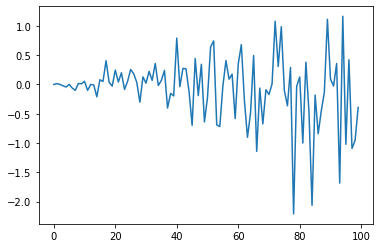

In [9]:
# create a simple white noise with increasing variance
from random import gauss
from random import seed
from matplotlib import pyplot
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# plot
pyplot.plot(data)
pyplot.show()

In [10]:
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]

In [15]:
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)

In [13]:
# fit model
model_fit = model.fit()

Iteration:      1,   Func. Count:     19,   Neg. LLF: 134.61803781240258
Iteration:      2,   Func. Count:     42,   Neg. LLF: 234.67765579469832
Iteration:      3,   Func. Count:     61,   Neg. LLF: 54.69064928295527
Iteration:      4,   Func. Count:     80,   Neg. LLF: 148.61335331394014
Iteration:      5,   Func. Count:     99,   Neg. LLF: 37.0386435609428
Iteration:      6,   Func. Count:    118,   Neg. LLF: 32.43415468514967
Iteration:      7,   Func. Count:    137,   Neg. LLF: 31.56118234181622
Iteration:      8,   Func. Count:    156,   Neg. LLF: 38.40622049345874
Iteration:      9,   Func. Count:    175,   Neg. LLF: 25.845205140007074
Iteration:     10,   Func. Count:    193,   Neg. LLF: 29.327531748664274
Iteration:     11,   Func. Count:    212,   Neg. LLF: 25.559005114213686
Iteration:     12,   Func. Count:    230,   Neg. LLF: 27.486840601341374
Iteration:     13,   Func. Count:    250,   Neg. LLF: 25.84906992396469
Iteration:     14,   Func. Count:    269,   Neg. LLF: 26.0

In [14]:
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)

C:\Users\Calvin\AppData\Local\Programs\Python\Python39\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


Iteration:      1,   Func. Count:     33,   Neg. LLF: 134.2317665883839
Iteration:      2,   Func. Count:     70,   Neg. LLF: 95143.89889693505
Iteration:      3,   Func. Count:    103,   Neg. LLF: 544.0642933451215
Iteration:      4,   Func. Count:    136,   Neg. LLF: 359.71934329672257
Iteration:      5,   Func. Count:    169,   Neg. LLF: 120.68440702788735
Iteration:      6,   Func. Count:    202,   Neg. LLF: 57.67989249945465
Iteration:      7,   Func. Count:    235,   Neg. LLF: 37.233827705923716
Iteration:      8,   Func. Count:    268,   Neg. LLF: 44.28485299843633
Iteration:      9,   Func. Count:    301,   Neg. LLF: 30.955777300460745
Iteration:     10,   Func. Count:    334,   Neg. LLF: 26.957534677373722
Iteration:     11,   Func. Count:    366,   Neg. LLF: 31.3580409658397
Iteration:     12,   Func. Count:    400,   Neg. LLF: 30.014493583203443
Iteration:     13,   Func. Count:    433,   Neg. LLF: 28.461108093598074
Iteration:     14,   Func. Count:    466,   Neg. LLF: 27.6

C:\Users\Calvin\AppData\Local\Programs\Python\Python39\lib\site-packages\arch\__future__\_utility.py:11: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  warnings.warn(


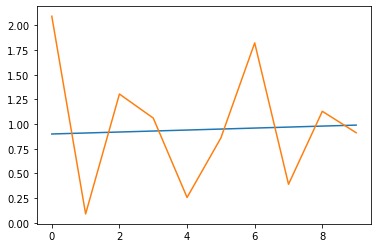

In [16]:
# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
seed(1)
# create dataset
data = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
n_test = 10
train, test = data[:-n_test], data[-n_test:]
# define model
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)
# fit model
model_fit = model.fit()
# forecast the test set
yhat = model_fit.forecast(horizon=n_test)
# plot the actual variance
var = [i*0.01 for i in range(0,100)]
pyplot.plot(var[-n_test:])
# plot forecast variance
pyplot.plot(yhat.variance.values[-1, :])
pyplot.show()

In [30]:
import numpy as np
import random
from matplotlib import pyplot as plt
from datetime import datetime
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


def getData():
    """
    Random walk model simply needs to predict the open price from previous timestep with some random noise
    params: arr (NumPy array)
    returns: output (Numpy array of size 1 x 5)
    """
    output = np.load("data\\tensor.npy")
    return output[:,562:,:]

data = getData()

In [40]:
import datetime as dt

In [66]:
apple_adj = web.DataReader('AAPL', 'yahoo', start='1999-11-26', end='2019-10-23')["Adj Close"]
amzn_adj = web.DataReader('AMZN', 'yahoo', start='1999-11-26', end='2019-10-23')["Adj Close"]
msft_adj = web.DataReader('MSFT', 'yahoo', start='1999-11-26', end='2019-10-23')["Adj Close"]

apple_returns = 100 * apple_adj.pct_change().dropna()
amzn_returns = 100 * amzn_adj.pct_change().dropna()
msft_returns = 100 * msft_adj.pct_change().dropna()

In [103]:
apple_returns

Date
1999-11-29   -0.525901
1999-11-30    3.502980
1999-12-01    5.300121
1999-12-02    6.913243
1999-12-03    4.367623
                ...   
2019-10-17    0.388272
2019-10-18    0.480287
2019-10-21    1.734279
2019-10-22   -0.228688
2019-10-23    1.341890
Name: Adj Close, Length: 5008, dtype: float64

In [71]:
.shapeapple_returns.to_numpy()

(5008,)

In [84]:
data[0].shape
apple_returns.to_numpy().shape

(5008,)

In [93]:
apple_new = np.insert(data[0], 1, apple_returns.to_numpy(), axis=1)
amzn_new = np.insert(data[1], 1, amzn_returns.to_numpy(), axis=1)
msft_new = np.insert(data[2], 1, msft_returns.to_numpy(), axis=1)

In [94]:
data.shape

(3, 5008, 13)

In [102]:
apple_new

array([[ 2.01910230e+07, -5.25900594e-01,  2.42100000e+02, ...,
         7.70221000e+01,  7.91526000e+01,  8.94440000e+01],
       [ 2.01910220e+07,  3.50298007e+00,  2.41160000e+02, ...,
         7.60037000e+01,  6.94962000e+01,  7.80203000e+01],
       [ 2.01910210e+07,  5.30012078e+00,  2.37520000e+02, ...,
         7.16200000e+01,  6.50244000e+01,  6.99936000e+01],
       ...,
       [ 1.99912010e+07,  1.73427938e+00,  1.01000000e+02, ...,
         7.88531000e+01,  7.26253000e+01,  6.80227000e+01],
       [ 1.99911300e+07, -2.28688122e-01,  9.81200000e+01, ...,
         7.54801000e+01,  7.79912000e+01,  6.97984000e+01],
       [ 1.99911290e+07,  1.34189037e+00,  9.42500000e+01, ...,
         6.96198000e+01,  7.65630000e+01,  8.00547000e+01]])